In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [ ]:
import os, sys 

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib


import graph_tool.all as gt 

import pickle
import warnings
warnings.filterwarnings('ignore')



In [3]:
blue = [163, 210, 198]
pink = [239, 204, 227]
red = [224, 127, 114]
orange = [235, 179, 103]
green = [192, 221, 114]
yellow = [250, 236, 119]
purple = [172, 127, 186]

colors = [blue, pink, red, orange, green, yellow, purple]

In [ ]:
# plotStyles.py
from matplotlib import rcParams

def apply_plot_style(font_size=14):
    rcParams["backend"] = "PDF"
    rcParams["figure.figsize"] = (4, 3)
    rcParams["font.family"] = "Serif"
    # rcParams["font.serif"] = ["Times"]
    rcParams["font.size"] = font_size
    rcParams["axes.labelsize"] = font_size
    rcParams["xtick.labelsize"] = font_size - 2
    rcParams["ytick.labelsize"] = font_size - 2
    rcParams["legend.numpoints"] = 1
    rcParams["legend.fontsize"] = "small"
    rcParams["lines.markersize"] = 4

    rcParams["figure.subplot.top"] = 0.95
    rcParams["figure.subplot.bottom"] = 0.2
    rcParams["figure.subplot.left"] = 0.2
    rcParams["figure.subplot.right"] = 0.95

    rcParams["image.cmap"] = "magma"
    rcParams["text.usetex"] = True

    rcParams["ps.usedistiller"] = "xpdf"
    rcParams["pdf.compression"] = 9
    rcParams["ps.useafm"] = True
    rcParams["path.simplify"] = True

    rcParams["text.latex.preamble"] = [
        # r"\usepackage{times}",
        # r"\usepackage{euler}",
        r"\usepackage{amssymb}",
        r"\usepackage{amsmath}",
    ]

apply_plot_style(font_size=14)

ValueError: Key text.latex.preamble: Could not convert ['\\usepackage{amssymb}', '\\usepackage{amsmath}'] to str

# SBM variations

finished @ 18/08/2019, 19:40

## Random Graph

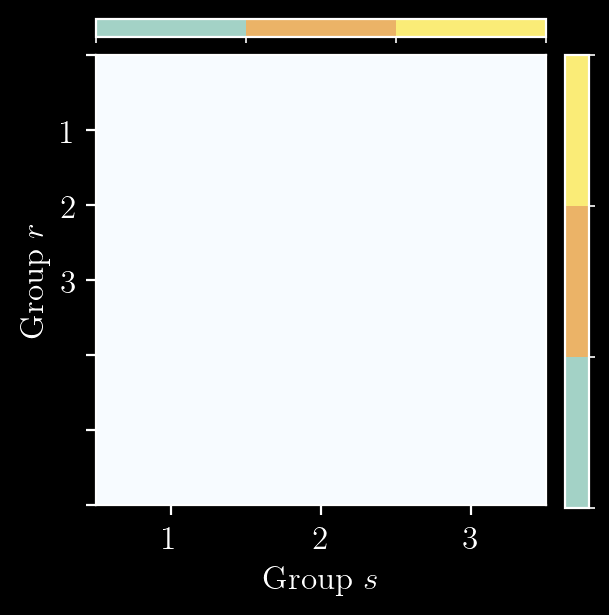

In [5]:
B = 3; N = 50


mat = np.array([0.8]*9)
mat.shape = (3,3)
def prob(a, b):
    return mat[a,b]

fig, ax = plt.subplots()  # setup the plot

ax.imshow(np.log(mat),cmap = plt.cm.Blues)
ax.set_xticklabels([""]+list(range(1,B+1)))
ax.set_yticklabels([""]+list(range(1,B+1)))
ax.set_xlabel('Group $s$', size=12)
ax.set_ylabel('Group $r$', size=12)
ax.xaxis.set_ticks_position('bottom')

cmap = matplotlib.colors.ListedColormap(np.vstack((blue,orange,yellow ))/255.0)
# define the bins and normalize
bounds = np.linspace(0, 1, B+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.88, 0.1955, 0.03, 0.755])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds[::-1], ticks=[])

p2 = ax.get_position().get_points().flatten()
ax_cbar1 = fig.add_axes([p2[0], 0.98, p2[2]-p2[0], 0.03]) 
cb1 = matplotlib.colorbar.ColorbarBase(ax_cbar1, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds, ticks=[],  orientation='horizontal')
# plt.savefig("01-assortative-adj.svg")
plt.show()

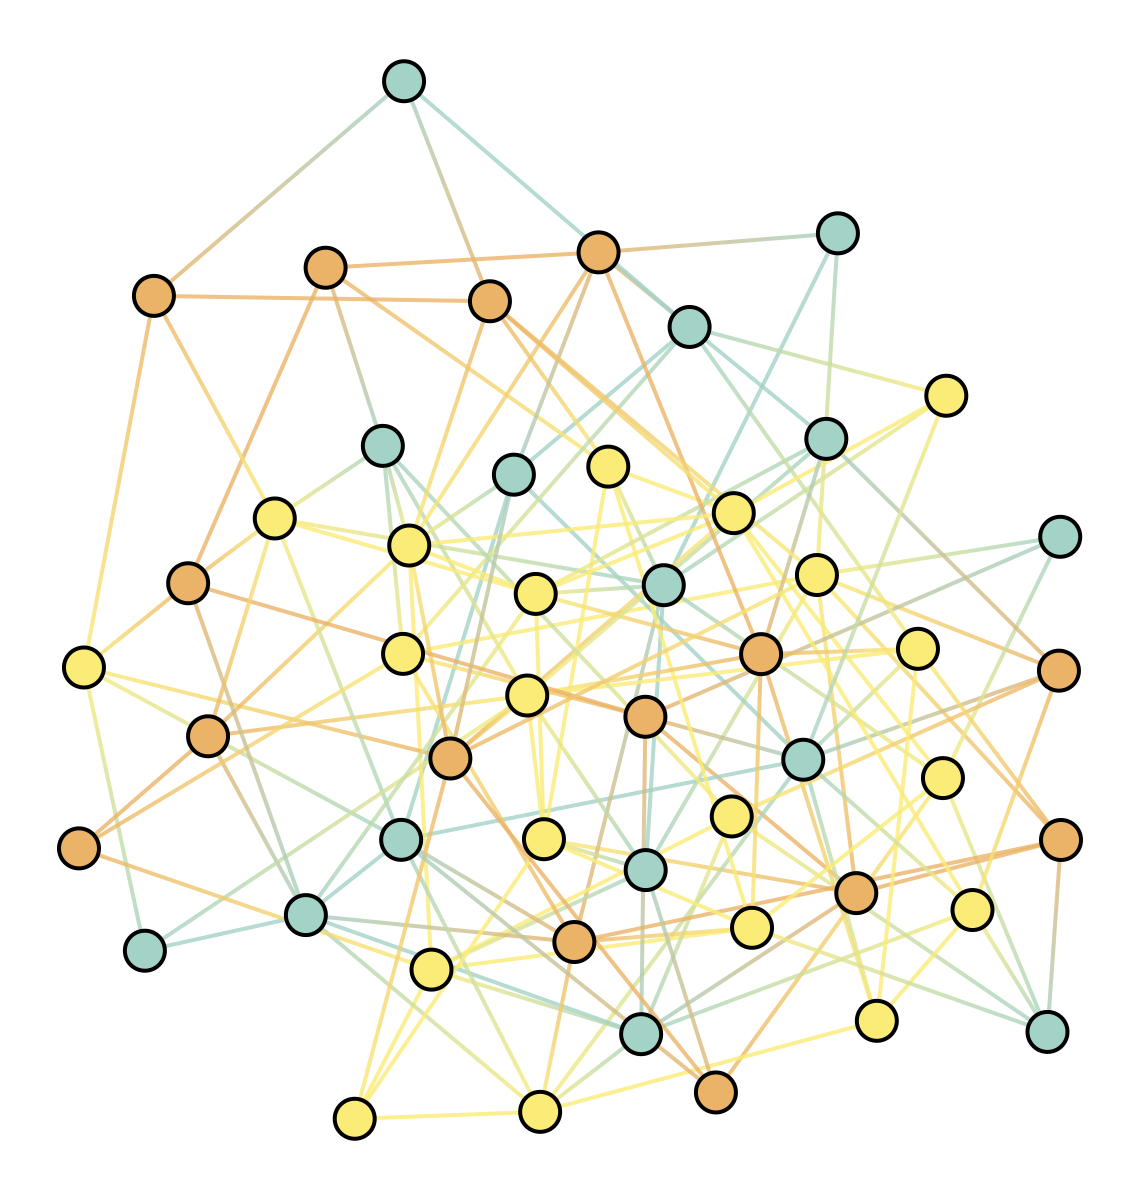

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2946bf2f90, at 0x7f2946ad94e0>

In [6]:

cmap = matplotlib.colors.ListedColormap(np.vstack((blue,orange,yellow ))/255.0)
np.random.seed(1213)
gt.seed_rng(1213)
g, bm = gt.random_graph(N=N,
                        deg_sampler=lambda: 1 + np.random.poisson(5),
                        directed=False,
                        model="blockmodel",
                        block_membership=lambda: np.random.randint(B),
                        edge_probs=prob, 
                        n_iter = 1000)

np.random.seed(1213)
gt.seed_rng(1213)
l = gt.label_largest_component(g)
g = gt.GraphView(g, vfilt=l) 
state = gt.BlockState(g, b=bm)
state.draw(vertex_color="black", 
           vertex_fill_color = bm,
           vertex_size=20, 
           vertex_anchor=0, 
           size = (300, 300), 
           vcmap = cmap)

## Assortative structure

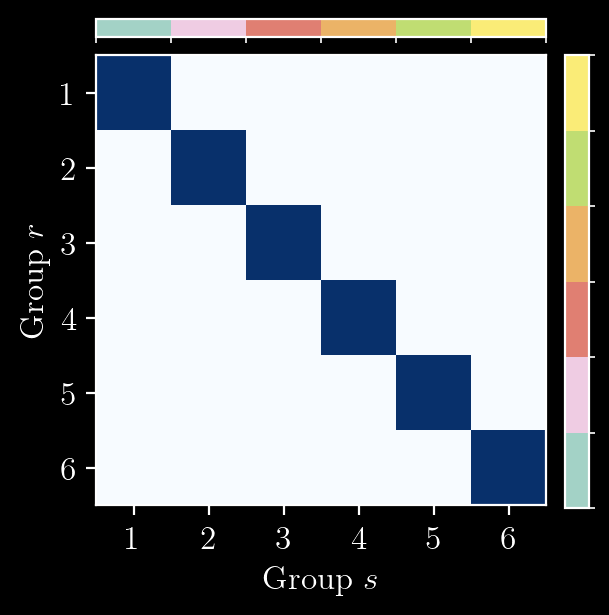

In [8]:
B = 6; N = 50

probs = np.array([0.99,0.01])
mat = np.zeros((6,6))

for i in range(6):
    for j in range(6): 
        if i==j: 
            mat[i, j] = probs[0]
        else: 
            mat[i, j] = probs[1]
    
mat = np.maximum( mat, mat.transpose() )


fig, ax = plt.subplots()  # setup the plot

ax.matshow(np.log(mat), cmap=matplotlib.cm.Blues)
ax.set_xticklabels([""]+list(range(1,B+1)))
ax.set_yticklabels([""]+list(range(1,B+1)))
ax.set_xlabel('Group $s$', size=12)
ax.set_ylabel('Group $r$', size=12)
ax.xaxis.set_ticks_position('bottom')

cmap = matplotlib.colors.ListedColormap(np.vstack((colors[:B]))/255.0)
# define the bins and normalize
bounds = np.linspace(0, 1, B+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.88, 0.1955, 0.03, 0.755])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds[::-1], ticks=[])

p2 = ax.get_position().get_points().flatten()
ax_cbar1 = fig.add_axes([p2[0], 0.98, p2[2]-p2[0], 0.03]) 
cb1 = matplotlib.colorbar.ColorbarBase(ax_cbar1, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds, ticks=[],  orientation='horizontal')
# plt.tight_layout()
plt.show()

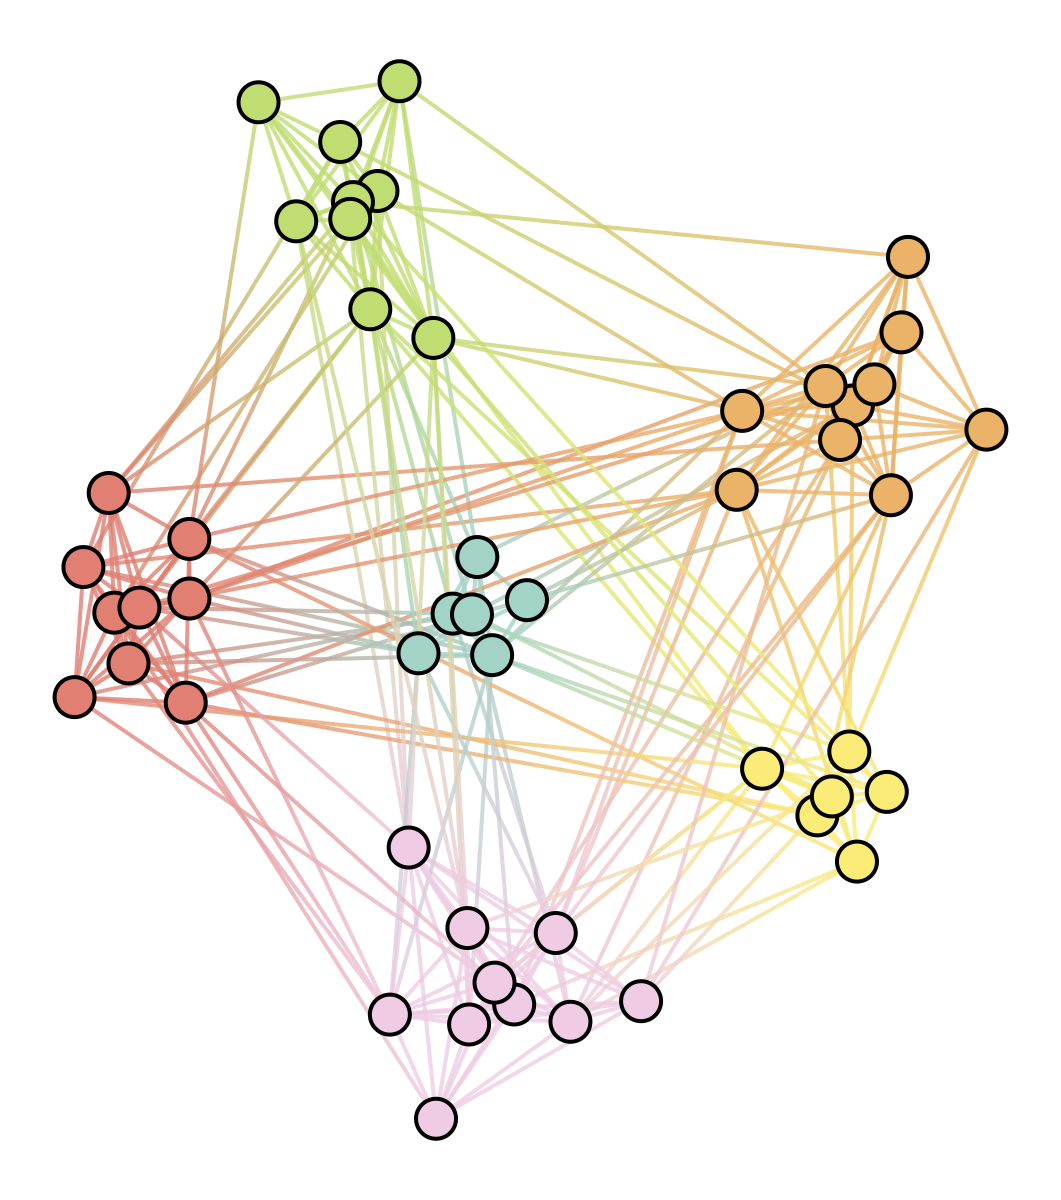

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2946a4de50, at 0x7f2946ad87c0>

In [9]:
cmap = matplotlib.colors.ListedColormap(np.vstack((colors[:B]))/255.0)

def prob(a, b):
    return mat[a,b]

np.random.seed(1213)
gt.seed_rng(1213)
g, bm = gt.random_graph(N=N,
                        deg_sampler=lambda: 1+np.random.poisson(10),
                        directed=False,
                        model="blockmodel",
                        block_membership=lambda: np.random.randint(B),
                        edge_probs=prob, 
                       n_iter = 1000)

np.random.seed(1213)
gt.seed_rng(1213)
pos = gt.sfdp_layout(g, groups = bm, mu = 100, p=1)

state = gt.BlockState(g, b=bm)
state.draw(vertex_color="black", 
           vertex_fill_color = bm,
           pos=pos, 
           vertex_size=20, 
           vertex_anchor=0, 
           vcmap = cmap)

## Disassortative structure -- Bipartite structure

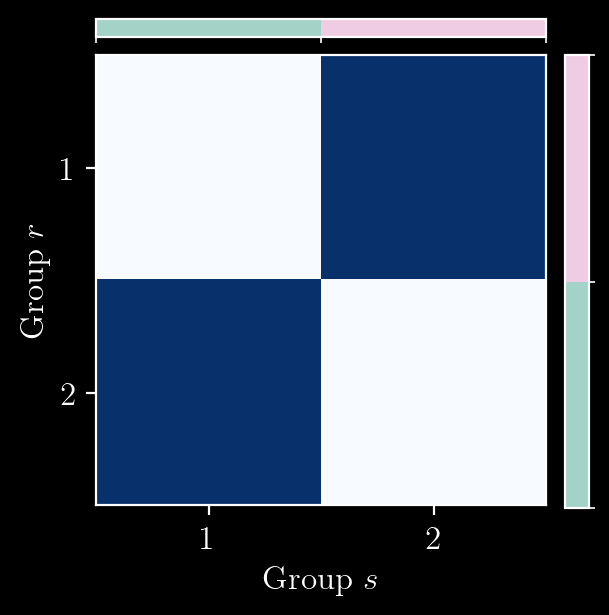

In [10]:
B = 2; N = 50 
cmap = matplotlib.colors.ListedColormap(np.vstack((colors[:B]))/255.0)

probs = np.array([1,0.0])
mat = np.zeros((B,B))
for i in range(B):
    for j in range(B): 
        if i==j: 
            mat[i, j] = probs[1]
        else: 
            mat[i, j] = probs[0]
    
mat = np.maximum( mat, mat.transpose() )

def prob(a, b):
    return mat[a,b]


fig, ax = plt.subplots(1, 1)  # setup the plot

ax.matshow(mat, cmap=matplotlib.cm.Blues)
ax.set_xticklabels([""]+list(range(1,B+1)))
ax.set_yticklabels([""]+list(range(1,B+1)))
ax.set_xlabel('Group $s$', size=12)
ax.set_ylabel('Group $r$', size=12)
ax.xaxis.set_ticks_position('bottom')

cmap = matplotlib.colors.ListedColormap(np.vstack((colors[:B]))/255.0)

# define the bins and normalize
bounds = np.linspace(0, 1, B+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.88, 0.1955, 0.03, 0.755])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds[::-1], ticks=[])

p2 = ax.get_position().get_points().flatten()
ax_cbar1 = fig.add_axes([p2[0], 0.98, p2[2]-p2[0], 0.03]) 
cb1 = matplotlib.colorbar.ColorbarBase(ax_cbar1, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds, ticks=[],  orientation='horizontal')
fig.savefig("03-bipartite-adj.svg")
plt.show()

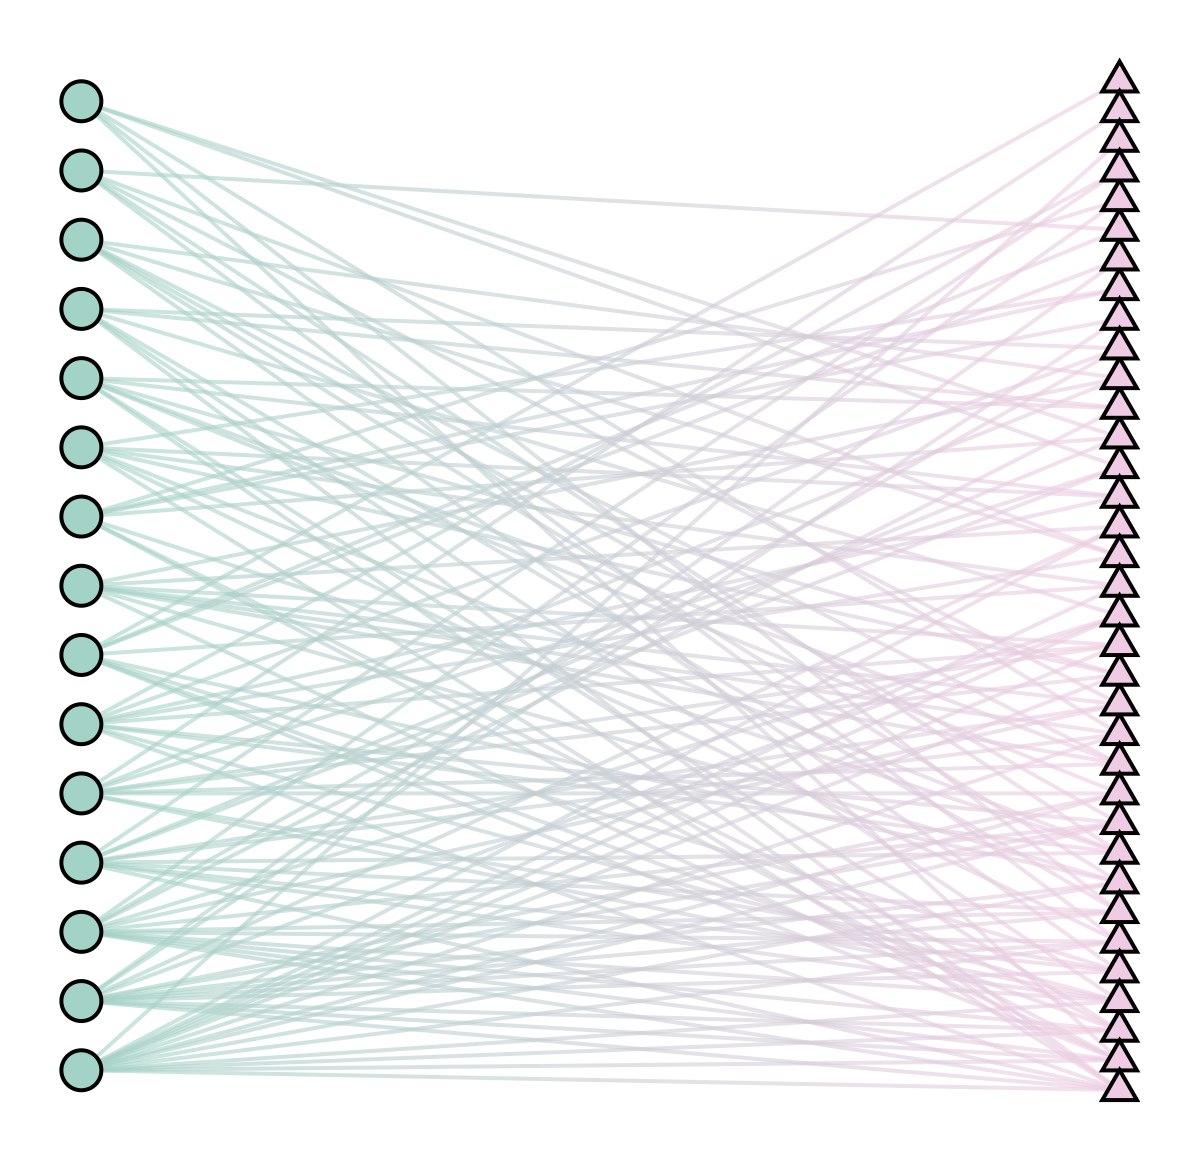

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2946a1b130, at 0x7f2937cd9630>,
 <GraphView object, directed, with 53 vertices and 52 edges, edges filtered by <EdgePropertyMap object with value type 'bool', for Graph 0x7f2946a71130, at 0x7f2946a3a0b0>, vertices filtered by <VertexPropertyMap object with value type 'bool', for Graph 0x7f2946a71130, at 0x7f2937cd8520>, at 0x7f2946a71130>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2946a71130, at 0x7f2946a3a2e0>)

In [13]:

np.random.seed(1213)
gt.seed_rng(1213)
g, bm = gt.random_graph(N=N,
                        deg_sampler=lambda: np.random.poisson(5),
                        directed=False,
                        model="blockmodel",
                        block_membership=lambda: np.random.choice(B, p=[0.3, 0.7]),
                        # np.random.randint(B)
                        edge_probs=prob, 
                       n_iter = 1000)


l = gt.label_largest_component(g)
u = gt.GraphView(g, vfilt=l) 

np.random.seed(1213)
gt.seed_rng(1213)
trivial_partition = u.vp['trivial_partition'] = u.new_vp("int")
for v in u.vertices():
    trivial_partition[v] = 0

state = gt.NestedBlockState(u, bs=[bm, trivial_partition])

edges_toDraw = []
for e in u.edges(): 
    if bm[e.source()] !=bm[e.target()]:
        edges_toDraw.append(e)

state.draw(vertex_color="black", 
           vertex_fill_color = bm,
           vertex_size=20, 
           vertex_shape = bm, 
           vertex_anchor=0, 
           vcmap = cmap, 
           layout="bipartite", 
           subsample_edges=edges_toDraw,
           beta=0.5,
           hshortcuts = 1, 
           hide=10,
           edge_pen_width=2.0)


## Core-periphery structure

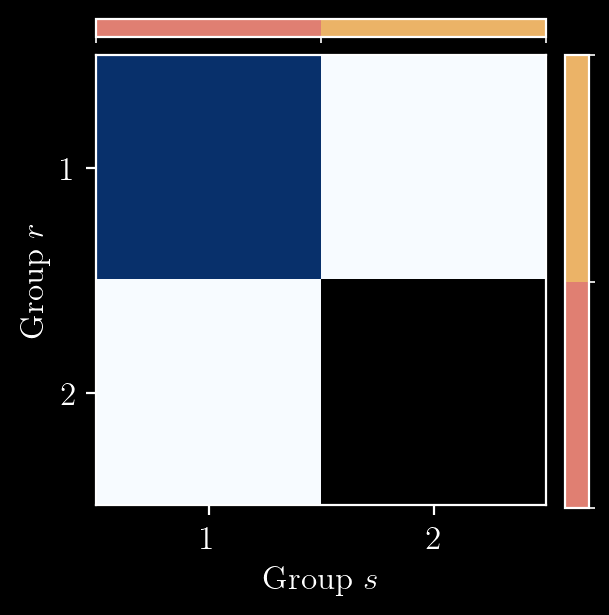

In [14]:
N = 50; B = 2
cmap = matplotlib.colors.ListedColormap(np.vstack((red, orange))/255.0)

mat = np.zeros((B,B))
mat[0,0] = 0.9 
mat[0,1] = 0.3
mat = mat+mat.T - np.tril(mat) + np.tril(mat, -1).T
def prob(a, b):
    return mat[a,b]

fig, ax = plt.subplots(1, 1)  # setup the plot

ax.matshow(np.log(mat), cmap=matplotlib.cm.Blues)
ax.set_xticklabels([""]+list(range(1,B+1)))
ax.set_yticklabels([""]+list(range(1,B+1)))
ax.set_xlabel('Group $s$', size=12)
ax.set_ylabel('Group $r$', size=12)
ax.xaxis.set_ticks_position('bottom')


# define the bins and normalize
bounds = np.linspace(0, 1, B+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.88, 0.1955, 0.03, 0.755])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds[::-1], ticks=[])

p2 = ax.get_position().get_points().flatten()
ax_cbar1 = fig.add_axes([p2[0], 0.98, p2[2]-p2[0], 0.03]) 
cb1 = matplotlib.colorbar.ColorbarBase(ax_cbar1, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds, ticks=[], orientation='horizontal')
plt.show()

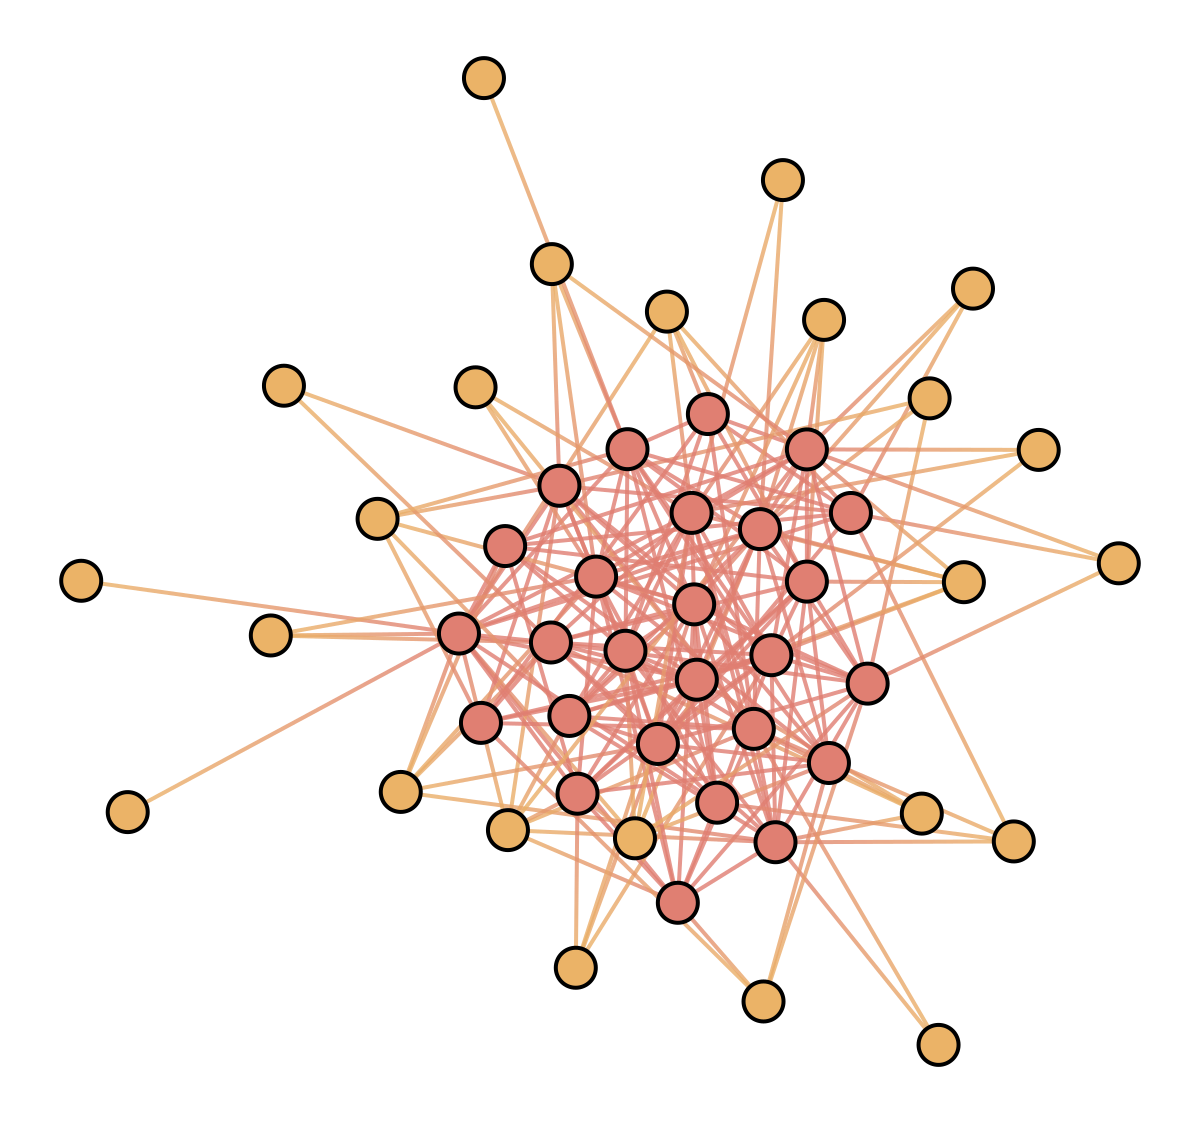

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2937cc7a00, at 0x7f2937ca7d20>

In [15]:

np.random.seed(1213)
gt.seed_rng(1213)    
g, bm = gt.random_graph(N=N,
                        deg_sampler=lambda: 1+np.random.poisson(8),
                        directed=False,
                        model="blockmodel",
                        block_membership=lambda: np.random.randint(B),
                        edge_probs=prob, 
                        n_iter = 1000)

state = gt.BlockState(g, b=bm)
state.draw(vertex_color="black", 
           vertex_fill_color = bm,
           vertex_size=20, 
           vertex_anchor=0, 
           vcmap = cmap)

## Ordered Structure

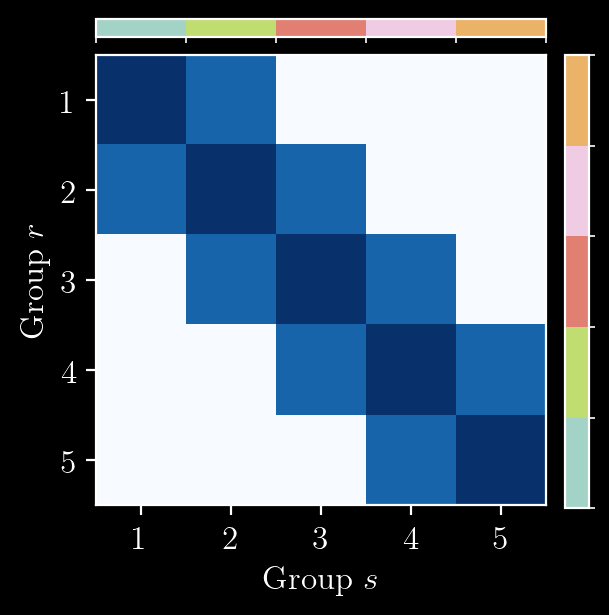

In [16]:
B = 5; N = 50 
cmap = matplotlib.colors.ListedColormap(np.vstack((colors[:B]))/255.0)

a = [0.5]*B
b = [0.4]*(B-1)
mat = np.diag(a, 0) + np.diag(b, -1) + np.diag(b, 1)
def prob(a, b):
    return mat[a,b]

fig, ax = plt.subplots(1, 1)  # setup the plot


ax.matshow(mat, cmap=matplotlib.cm.Blues)
ax.set_xticklabels([""]+list(range(1,B+1)))
ax.set_yticklabels([""]+list(range(1,B+1)))
ax.set_xlabel('Group $s$', size=12)
ax.set_ylabel('Group $r$', size=12)
ax.xaxis.set_ticks_position('bottom')

cmap = matplotlib.colors.ListedColormap(np.vstack((blue,green,red,pink,orange))/255.0)

# define the bins and normalize
bounds = np.linspace(0, 1, B+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.88, 0.1955, 0.03, 0.755])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds[::-1], ticks=[])

p2 = ax.get_position().get_points().flatten()
ax_cbar1 = fig.add_axes([p2[0], 0.98, p2[2]-p2[0], 0.03]) 
cb1 = matplotlib.colorbar.ColorbarBase(ax_cbar1, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds, ticks=[], orientation='horizontal')
plt.show()

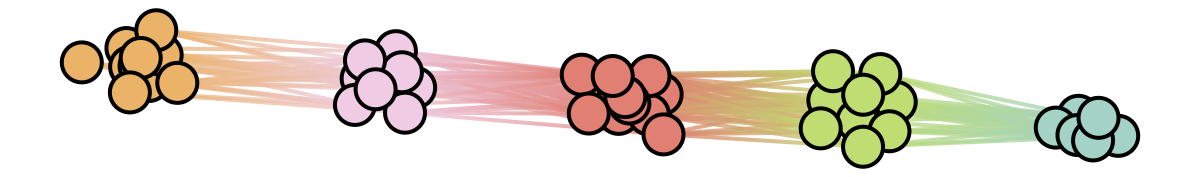

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2937ddaf90, at 0x7f2937b91a90>

In [17]:

np.random.seed(1213)
gt.seed_rng(1213)
g, bm = gt.random_graph(N=N,
                        deg_sampler=lambda: 1+np.random.poisson(10),
                        directed=False,
                        model = "blockmodel", 
                        block_membership=lambda:np.random.randint(B),
                        edge_probs=prob, 
                        n_iter = 1000)

state = gt.BlockState(g, b = bm)
pos = gt.sfdp_layout(g, 
                     groups = state.b,
                     multilevel = True,
                     mu = 10, 
                     p =  1)
state.draw(vertex_color="black", 
           pos = pos, 
           vertex_size=20, 
           vertex_fill_color = bm, 
           vertex_anchor=0, 
           vcmap = cmap)

## Mixing patterns

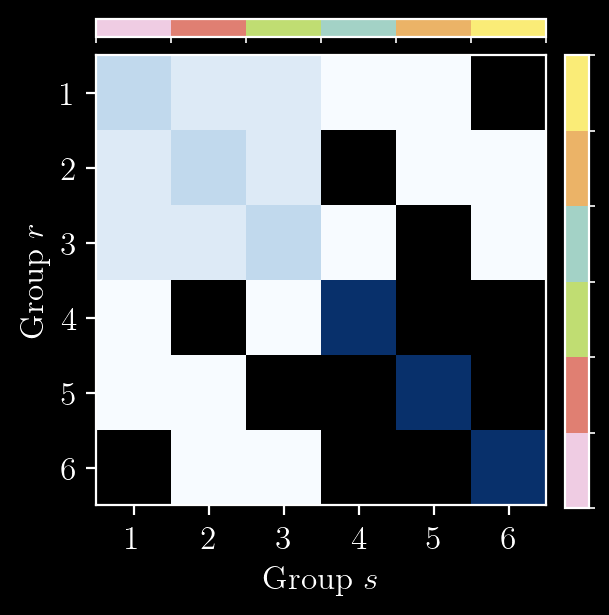

In [18]:
B = 6; N = 50
cmap = matplotlib.colors.ListedColormap(np.vstack((colors[:B]))/255.0)
in_group = [0,1,2]
out_group = [3,4,5] # periphery out_group 
mat = np.zeros((B,B))

for i in range(B):
    for j in range(i, B): 
        if i in in_group and j in in_group: 
            mat[i,j] = 0.01
            if i == j: 
                mat[i,j] = 0.02
        if i in out_group and j in out_group: 
            if i == j: 
                mat[i,j] = 0.99
        if i in in_group and j in out_group: 
            if (i == 0 and j == 5) or (i == 1 and j == 3) or (i == 2 and j == 4): 
                mat[i,j] = 0 
                
            else: 
                mat[i,j] = 0.005

mat = mat+mat.T - np.tril(mat) + np.tril(mat, -1).T
def prob(a,b):
    return mat[a,b]
probs = []
for i in range(mat.shape[0]):
    for j in range(i, mat.shape[0]):
        probs.append((i,j, mat[i,j]))
        

fig, ax = plt.subplots(1, 1)  # setup the plot
# mat = g.gp.w
ax.matshow(np.log(mat), cmap=matplotlib.cm.Blues)
ax.set_xticklabels([""]+list(range(1,B+1)))
ax.set_yticklabels([""]+list(range(1,B+1)))
ax.set_xlabel('Group $s$', size=12)
ax.set_ylabel('Group $r$', size=12)
ax.xaxis.set_ticks_position('bottom')

cmap = matplotlib.colors.ListedColormap(np.vstack((pink,red,green,blue, orange, yellow  ))/255.0)

# define the bins and normalize
bounds = np.linspace(0, 1, B+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.88, 0.1955, 0.03, 0.755])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds[::-1], ticks=[])

p2 = ax.get_position().get_points().flatten()
ax_cbar1 = fig.add_axes([p2[0], 0.98, p2[2]-p2[0], 0.03]) 
cb1 = matplotlib.colorbar.ColorbarBase(ax_cbar1, cmap=cmap, norm=norm,
    spacing='proportional', boundaries=bounds, ticks=[], orientation='horizontal')
plt.show()

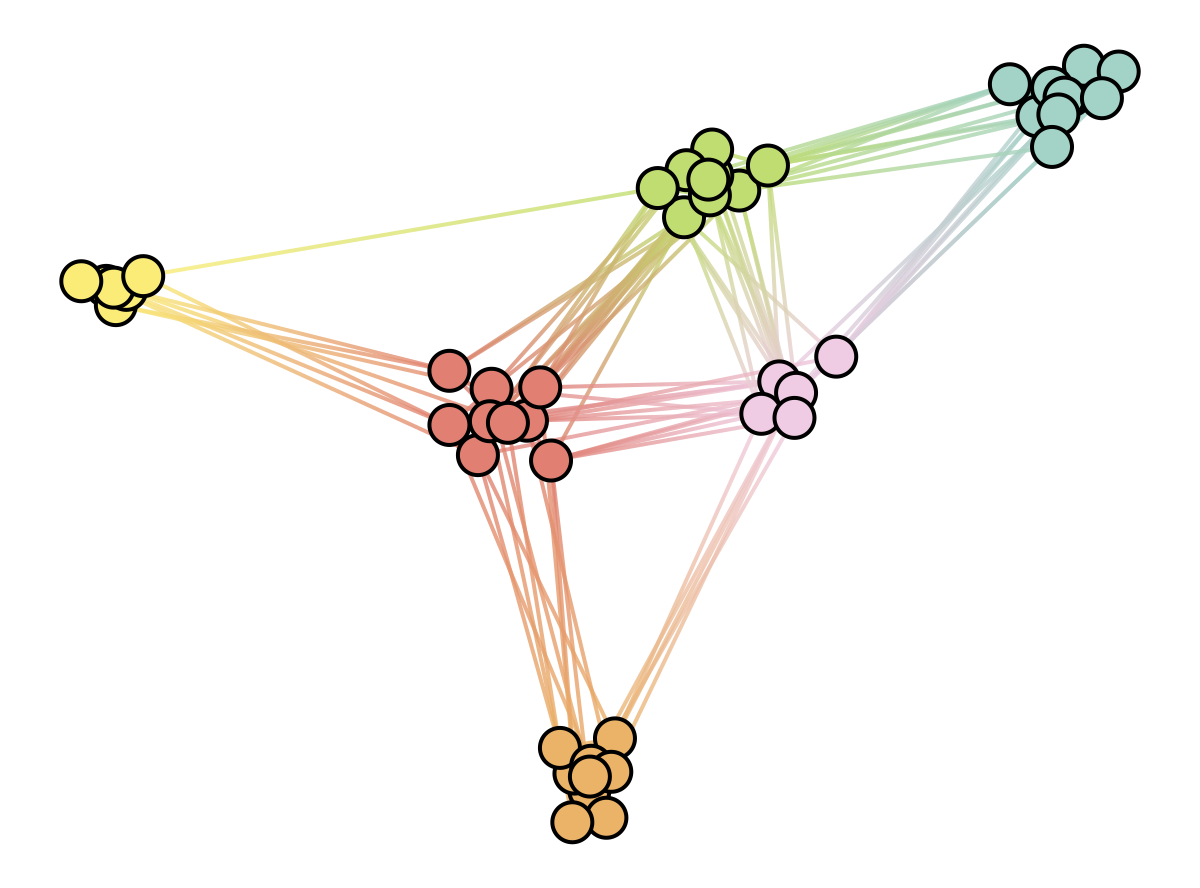

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2946b64870, at 0x7f2937ca6430>

In [19]:

# Simple blockmodel with B blocks.
np.random.seed(1213)
gt.seed_rng(1213)
g, bm = gt.random_graph(N=N,
                        deg_sampler=lambda: np.random.poisson(8),
                        directed=False,
                        model="blockmodel",
                        block_membership=np.random.randint(0, B, N),
                        edge_probs=prob, 
                        n_iter = 1000)

state = gt.BlockState(g, b = bm)

pos = gt.sfdp_layout(g, 
                     groups = state.b,
                     multilevel = True,
                     mu = 100,
                     p =  1)
state.draw(vertex_color="black", 
           vertex_size=20, 
           pos=pos,
           vertex_fill_color = bm, 
           edge_gradient=g.new_ep("vector<double>", val=[0]),
           vertex_anchor=0, 
           vcmap = cmap)